# Hierarchical Clustering

## 1. Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage

## 2. Preparing data points.

In [ ]:
X, y, c = make_blobs(
    n_samples=500,
    cluster_std=0.8,
    centers=4,
    random_state=42,
    n_features=2,
    return_centers=True
)

In [ ]:
df_blobs = pd.DataFrame(
    {
        "x1" : X[:, 0],
        "x2" : X[:, 1]
    }
)
df_blobs

,x1,x2
0,-7.918909,6.760982
1,-9.037137,-6.923545
2,6.391721,1.326531
3,-2.822884,7.843474
4,-5.918656,-7.206570
...,...,...
495,-7.718843,8.063230
496,-2.570879,9.287208
497,-7.148255,-5.544892
498,-7.297806,-6.040902


In [ ]:
df_centers = pd.DataFrame(
    {
        "x1" : c[:, 0],
        "x2" : c[:, 1]
    }
)
df_centers

,x1,x2
0,-2.509198,9.014286
1,4.639879,1.973170
2,-6.879627,-6.880110
3,-8.838328,7.323523


### 3. Visualizing data points.

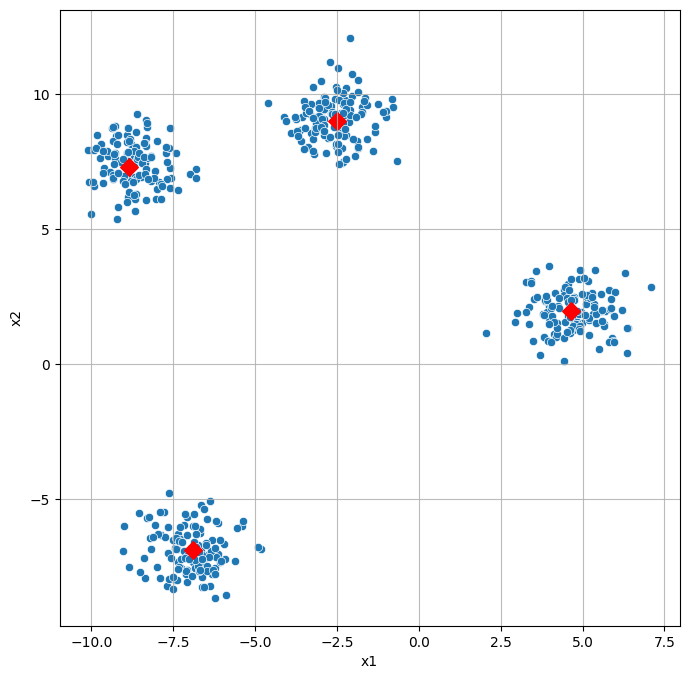

In [ ]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x="x1", y="x2")
plt.scatter(data=df_centers, x="x1", y="x2", color="red", s=80, marker="D")
plt.grid(alpha=6/7)
plt.show()

## 4. Dendrogram and hierarchical clustering

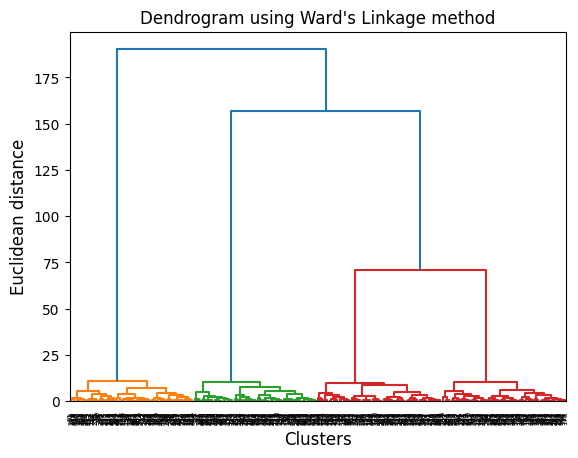

In [ ]:
dendrogram_plot = dendrogram(linkage(X, method="ward"))
plt.title("Dendrogram using Ward's Linkage method")
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Euclidean distance", fontsize=12)
plt.show()

In [ ]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
y_hc= hierarchical_clustering.fit_predict(X)
print(y_hc)

[1 0 2 3 0 0 1 0 2 0 2 3 2 3 0 2 3 1 1 3 2 3 2 1 1 0 0 1 1 3 0 3 3 3 0 0 2
 2 1 1 0 2 3 3 3 2 2 2 0 1 0 3 1 0 2 3 3 1 0 1 1 3 0 1 2 0 0 1 2 0 2 0 0 1
 3 1 3 0 2 3 0 2 0 3 1 1 1 1 2 3 1 0 2 0 2 1 3 2 3 1 2 2 2 1 1 3 3 1 3 1 0
 1 1 1 1 0 2 1 0 0 3 2 0 2 1 2 2 0 0 1 1 2 2 0 2 1 1 1 2 2 0 1 2 2 0 1 1 3
 3 3 0 0 2 2 3 1 3 1 0 0 1 1 2 2 0 3 2 0 1 1 0 3 3 1 1 3 3 0 0 0 3 1 3 3 1
 1 3 2 3 0 0 1 1 0 3 0 3 3 1 0 3 3 0 1 2 1 0 2 2 1 1 0 1 3 3 0 3 1 3 2 2 3
 1 3 2 3 3 0 0 2 0 2 3 0 1 0 3 0 2 2 2 0 3 2 1 1 2 3 3 0 3 3 3 3 2 2 1 3 0
 2 3 3 1 3 0 0 2 3 2 0 3 3 2 1 3 3 3 2 1 0 3 2 2 3 0 3 2 1 2 0 0 3 3 2 1 2
 1 2 0 2 0 1 2 2 3 2 0 0 2 2 0 1 2 2 2 0 1 2 2 2 1 2 2 1 1 1 0 1 1 1 1 1 3
 1 2 1 3 3 1 2 2 2 3 3 0 3 0 3 2 0 0 2 0 1 1 0 1 3 0 3 2 3 0 0 1 2 0 2 2 1
 3 0 2 0 1 2 1 2 1 1 0 1 3 0 1 0 3 0 1 0 1 2 3 3 0 0 2 3 3 3 2 1 0 3 2 2 0
 1 0 0 0 3 2 0 3 2 3 3 2 3 2 3 1 0 2 3 0 1 3 2 2 0 0 0 1 0 2 1 3 3 1 2 1 2
 3 0 0 0 3 2 2 1 3 0 0 0 2 0 3 2 1 2 0 2 3 2 3 2 0 3 1 1 3 3 1 1 3 0 2 0 2
 3 1 1 3 0 1 1 2 1 1 3 1 

In [ ]:
df_blobs["cluster"] = y_hc
df_blobs

,x1,x2,cluster
0,-7.918909,6.760982,1
1,-9.037137,-6.923545,0
2,6.391721,1.326531,2
3,-2.822884,7.843474,3
4,-5.918656,-7.206570,0
...,...,...,...
495,-7.718843,8.063230,1
496,-2.570879,9.287208,3
497,-7.148255,-5.544892,0
498,-7.297806,-6.040902,0


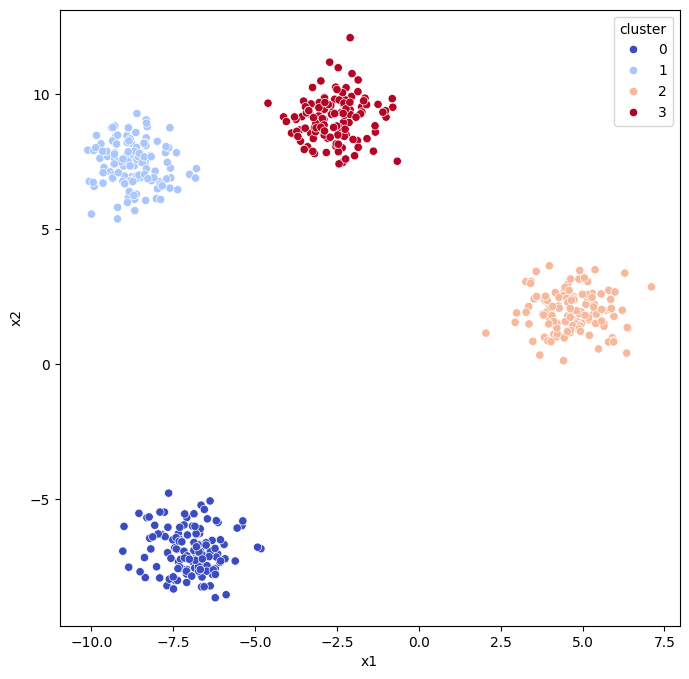

In [ ]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster", palette="coolwarm")
plt.show()


In [ ]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(df_blobs, # df_blobs or X
                           linkagefun=lambda x: linkage(x, method='ward'))
fig.show()

## 5. Silhouette score

In [ ]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6072310439680135
For n_clusters = 3 The average silhouette_score is : 0.7819189406141627
For n_clusters = 4 The average silhouette_score is : 0.8336135403234282
For n_clusters = 5 The average silhouette_score is : 0.6976987225566063


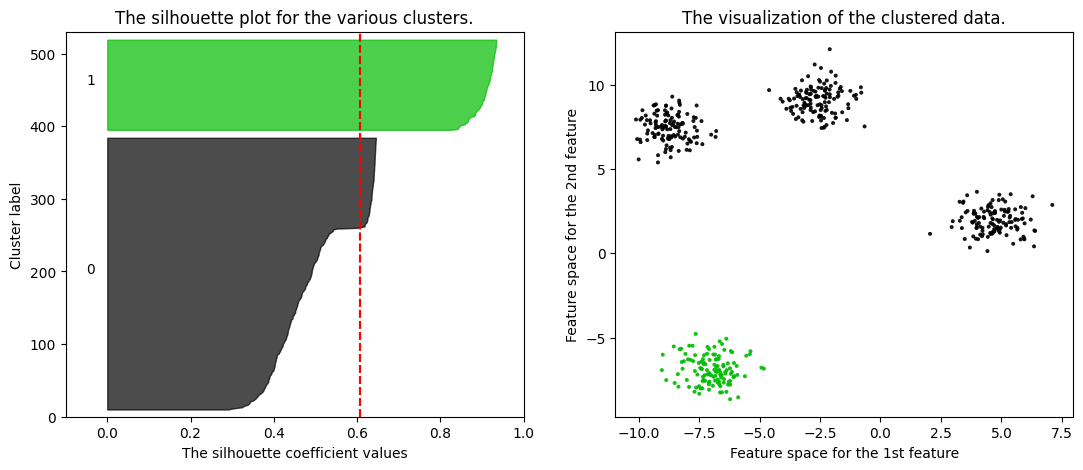

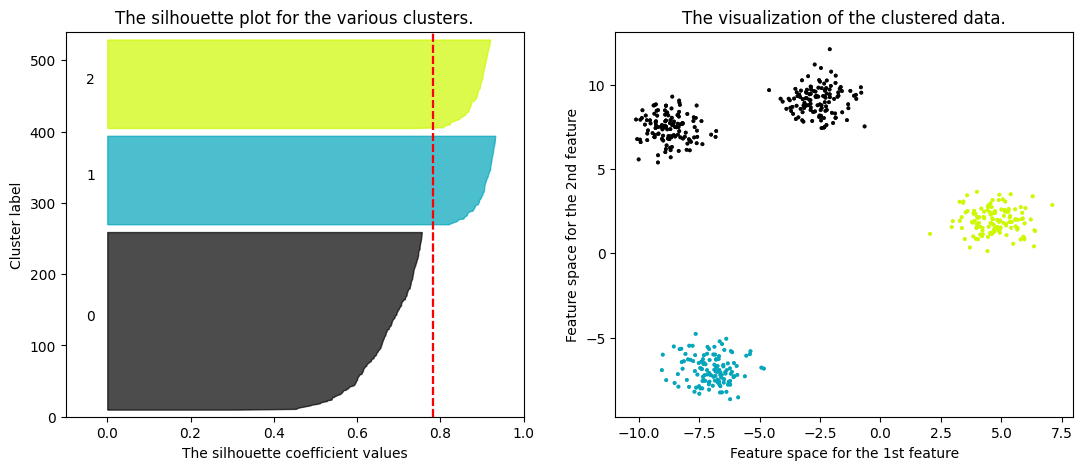

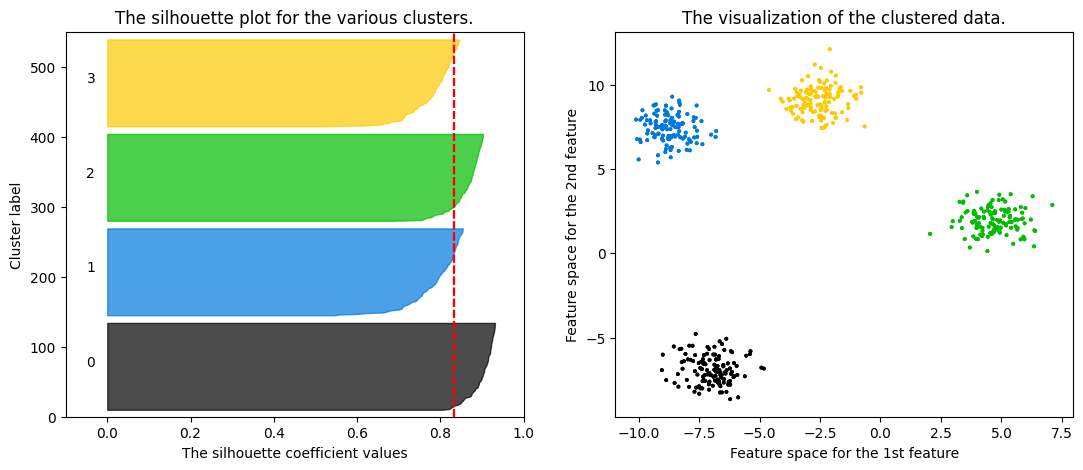

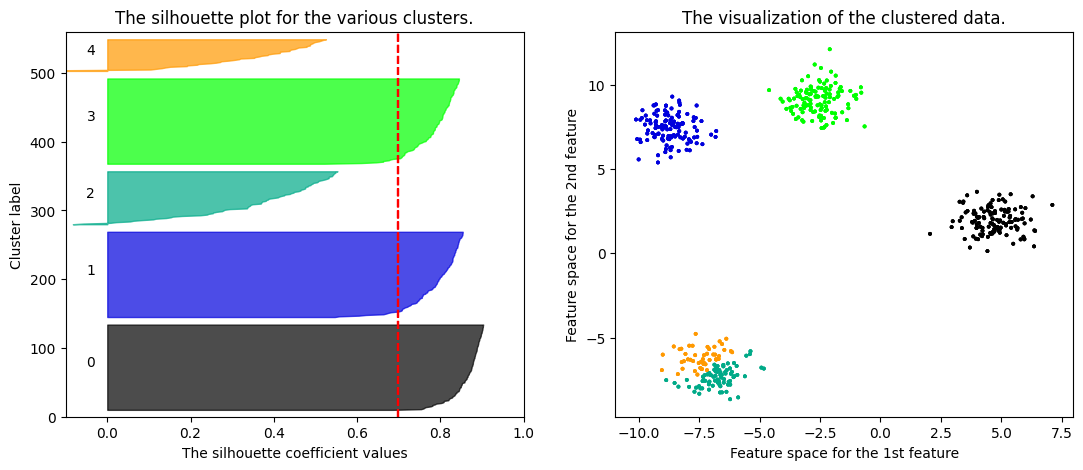

In [ ]:
for n_clusters in range(2,6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13, 5)

    # The 1st subplot is the Silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with agglomerated clustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity="euclidean", linkage="ward")
    clusterer_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, clusterer_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clusterer_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusterer_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(clusterer_labels.astype(float) / n_clusters)
        ax2.scatter(
            x= X[:, 0],
            y= X[:, 1],
            marker=".",
            s=30,
            lw=0,
            alpha=0.7,
            c=colors,
            edgecolor="k",
        )

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49a4b13f-b86e-4dbe-8cae-5dc522a92da6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>